In [97]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.interpolate as ip
from sklearn.linear_model import LinearRegression

In [98]:
def findMeanOfArrays(array):
    meanArray1 = []
    meanArray2 = []
    meanArray3 = []
    meanArray4 = []
    meanArray5 = []
    meanArray6 = []
    meanArray7 = []
    meanArray8 = []
    meanArray9 = []
    meanArray10 = []
    #meanArray11 = []
    #meanArray12 = []
    #meanArray13 = []
    #meanArray14 = []

    for i in range(array[:,0].size):
        if (array[i][0] == 10):
            meanArray1.append(array[i][1])
        if (array[i][0] == 20):
            meanArray2.append(array[i][1])
        if (array[i][0] == 50):
            meanArray3.append(array[i][1])
        if (array[i][0] == 100):
            meanArray4.append(array[i][1])
        if (array[i][0] == 200):
            meanArray5.append(array[i][1])
        if (array[i][0] == 500):
            meanArray6.append(array[i][1])
        if (array[i][0] == 1000):
            meanArray7.append(array[i][1])
        if (array[i][0] == 2000):
            meanArray8.append(array[i][1])
        if (array[i][0] == 5000):
            meanArray9.append(array[i][1])
        if (array[i][0] == 10000):
            meanArray10.append(array[i][1])
        #if (array[i][0] == 20000):
        #    meanArray11.append(array[i][1])
        #if (array[i][0] == 50000):
        #    meanArray12.append(array[i][1])
        #if (array[i][0] == 100000):
        #    meanArray13.append(array[i][1])
        #if (array[i][0] == 200000):
        #    meanArray14.append(array[i][1])

            
    mean1 = np.mean(meanArray1)
    mean2 = np.mean(meanArray2)
    mean3 = np.mean(meanArray3)
    mean4 = np.mean(meanArray4)
    mean5 = np.mean(meanArray5)
    mean6 = np.mean(meanArray6)
    mean7 = np.mean(meanArray7)
    mean8 = np.mean(meanArray8)
    mean9 = np.mean(meanArray9)
    mean10 = np.mean(meanArray10)
    #mean11 = np.mean(meanArray11)
    #mean12 = np.mean(meanArray12)
    #mean13 = np.mean(meanArray13)
    #mean14 = np.mean(meanArray14)
    
    
    return [mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10] #,mean11,mean12,mean13,mean14]

def findRegressionLine(xVal, yVal):
    reg = LinearRegression().fit(xVal.reshape(-1,1), yVal)
    return reg

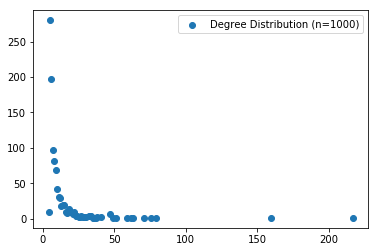

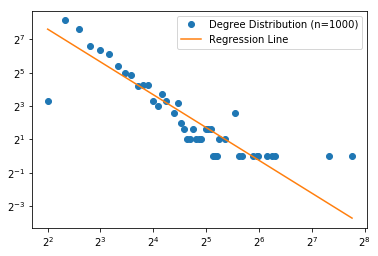

Regression Line Function (log2log2 scale): -1.9685913980469893x + 11.54478445246081
Degree(n) = n^-1.9685913980469893


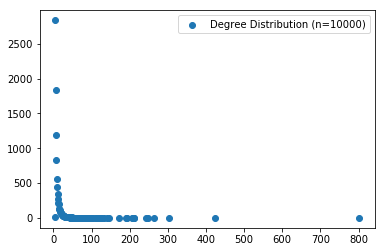

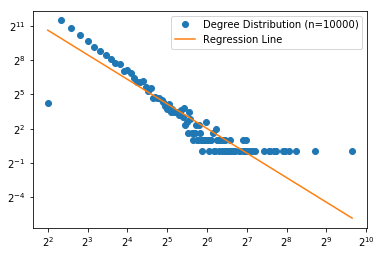

Regression Line Function: -2.153412625629466x + 14.925656519010616
Degree(n) = n^-2.153412625629466


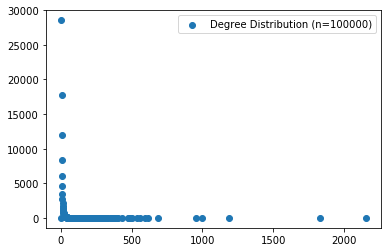

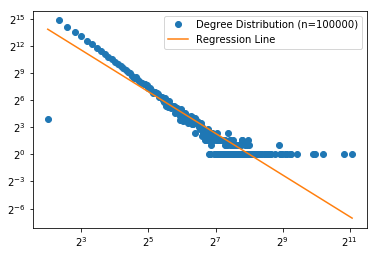

Regression Line Function: -2.3025461332026027x + 18.436553909222127
Degree(n) = n^-2.3025461332026027


In [99]:
cluster = np.genfromtxt("clustering.csv", delimiter=',')
diameter = np.genfromtxt("diameter.csv", delimiter=',')

degreeHist1000 = np.genfromtxt("degreeHist1000.csv", delimiter=',')
degreeHist10000 = np.genfromtxt("degreeHist10000.csv", delimiter=',')
degreeHist100000 = np.genfromtxt("degreeHist100000.csv", delimiter=',')

#print(degreeHist1000[:, 0])
#print(degreeHist1000[:, 1])

########################
# Degree Distributions #
########################

# N = 1000
plt.scatter(degreeHist1000[:,0], degreeHist1000[:,1], label="Degree Distribution (n=1000)", )
plt.legend()
plt.show()

regr = LinearRegression()
regr.fit((degreeHist1000[:,0]).reshape(-1,1), (degreeHist1000[:,1]).reshape(-1,1))
predY = regr.predict( (degreeHist1000[:,0]).reshape(-1,1) )

logX = np.log2(degreeHist1000[:,0])
logHist1000 = np.log2(degreeHist1000[:,1])
hist1000Coeffs = np.polyfit(logX[1:-1], logHist1000[1:-1], deg=1)
poly = np.poly1d(hist1000Coeffs)
yFit = lambda x: np.exp2(poly(np.log2(x)))

plt.loglog( degreeHist1000[:,0], degreeHist1000[:,1], 'o', label="Degree Distribution (n=1000)", basex=2, basey=2, linestyle='')
plt.loglog( degreeHist1000[:,0], yFit(degreeHist1000[:,0]), basex=2, basey=2, label="Regression Line")
plt.legend()
plt.show()

print("Regression Line Function (log2log2 scale): " + str(hist1000Coeffs[0]) + "x + " + str(hist1000Coeffs[1]) )
print("Degree(n) = n^" + str(hist1000Coeffs[0]))

# N = 10000
plt.scatter(degreeHist10000[:,0], degreeHist10000[:,1], label="Degree Distribution (n=10000)", )
plt.legend()
plt.show()

logX = np.log2(degreeHist10000[:,0])
logHist10000 = np.log2(degreeHist10000[:,1])
hist10000Coeffs = np.polyfit(logX[1:-2], logHist10000[1:-2], deg=1)
poly = np.poly1d(hist10000Coeffs)
yFit = lambda x: np.exp2(poly(np.log2(x)))

plt.loglog( degreeHist10000[:,0], degreeHist10000[:,1], 'o', label="Degree Distribution (n=10000)", basex=10, basey=10, linestyle='')
plt.loglog( degreeHist10000[:,0], yFit(degreeHist10000[:,0]), basex=2, basey=2, label="Regression Line")
plt.legend()
plt.show()

print("Regression Line Function: " + str(hist10000Coeffs[0]) + "x + " + str(hist10000Coeffs[1]) )
print("Degree(n) = n^" + str(hist10000Coeffs[0]))

# N = 100000

plt.scatter(degreeHist100000[:,0], degreeHist100000[:,1], label="Degree Distribution (n=100000)", )
plt.legend()
plt.show()

logX = np.log2(degreeHist100000[:,0])
logHist100000 = np.log2(degreeHist100000[:,1])
hist100000Coeffs = np.polyfit(logX[1:-4], logHist100000[1:-4], deg=1)
poly = np.poly1d(hist100000Coeffs)
yFit = lambda x: np.exp2(poly(np.log2(x)))

plt.loglog( degreeHist100000[:,0], degreeHist100000[:,1], 'o', label="Degree Distribution (n=100000)", basex=10, basey=10, linestyle='')
plt.loglog( degreeHist100000[:,0], yFit(degreeHist100000[:,0]), basex=2, basey=2, label="Regression Line")
plt.legend()
plt.show()

print("Regression Line Function: " + str(hist100000Coeffs[0]) + "x + " + str(hist100000Coeffs[1]) )
print("Degree(n) = n^" + str(hist100000Coeffs[0]))


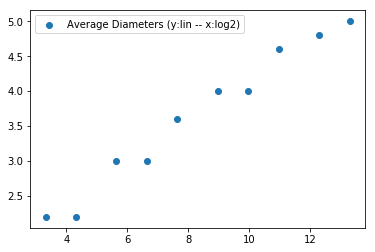

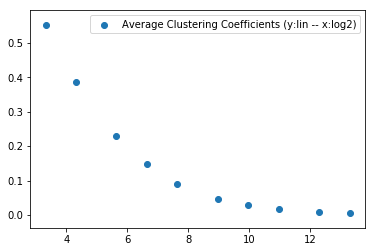

In [130]:
xVal = [10,20,50,100,200,500,1000,2000,5000,10000]#,20000,50000,100000,200000]

yDiameter = findMeanOfArrays(diameter)
yCluster = findMeanOfArrays(cluster)

# Diameter Plots
plt.scatter(np.log2(xVal), (yDiameter), label="Average Diameters (y:lin -- x:log2)")
plt.legend()
plt.show()


# Clustering Coefficient Plots
plt.scatter(np.log2(xVal), (yCluster), label="Average Clustering Coefficients (y:lin -- x:log2)")
plt.legend()
plt.show()
